In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
sns.set_theme()

# 1.Preprocesado

Procederemos a preprocesar el conjunto de datos para obtener los datos en el formato conveniente para las gráficas del mapa de calor y el de árbol.

## 1.1 Primer vistazo

Comenzaremos viendo el formato actual de los datos.

In [31]:
vacunas_df = pd.read_csv('country_vaccinations.csv')
vacunas_df.head(n=10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


## 1.2 Limpieza

Como podemos observar, hay muchos valores ausentes. Reemplazaremos estos por ceros.

In [32]:
vacunas_df = vacunas_df.fillna(0);
vacunas_df.head(n=10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
7,Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,1580.0,0.00,0.00,0.0,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
8,Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,1794.0,0.00,0.00,0.0,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
9,Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,2008.0,0.00,0.00,0.0,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


Eliminamos las columnas que no nos interesa estudiar:

In [33]:
vacunas_df = vacunas_df.drop(columns = ['source_name',
                                  'source_website',
                                  'daily_vaccinations_per_million',
                                  'daily_vaccinations_raw',
                                  'iso_code'])

print("\nDataset de ingresados:\n")
print(vacunas_df.tail(5))


Dataset de ingresados:

        country        date  total_vaccinations  people_vaccinated  \
12965  Zimbabwe  2021-04-15            285881.0           252932.0   
12966  Zimbabwe  2021-04-16            304701.0           269732.0   
12967  Zimbabwe  2021-04-17            311901.0           276095.0   
12968  Zimbabwe  2021-04-18            314446.0           278583.0   
12969  Zimbabwe  2021-04-19            316991.0           280568.0   

       people_fully_vaccinated  daily_vaccinations  \
12965                  32949.0             13172.0   
12966                  34969.0             14071.0   
12967                  35806.0             12738.0   
12968                  35863.0             12993.0   
12969                  36423.0             11773.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
12965                            1.92                           1.70   
12966                            2.05                           1.81   
12967        

## 1.3 Reestructuración del dataset

Como podemos observar,  la variable vaccines aparece como una lista de nombres de vacunas separadas con el carácter ‘,’. Vamos a generar una fila por cada nombre de vacuna (para cada registro), replicando el resto de los datos del registro tantas veces como vacunas haya. Para el caso que nos ocupa, los únicos datos que nos interesan son: el país, la vacuna y la fecha del primer registro de dicho país y dicha vacuna (de manera que podemos saber cuándo un país comenzó a usar una vacuna determinada).  

Para ello, comenzamos agrupando por país y quedándonos siempre con el primer registro del grupo. Como estos están ordenados por fecha, nos estaremos quedando con el primer registro de cada país. Acto seguido, proyectamos los campos de nuestro interés: vaccines, country y date.

In [5]:
pais_vacunas_string = vacunas_df.groupby('country').first( )
pais_vacunas_string = pais_vacunas_string.reset_index()
pais_vacunas_string = pais_vacunas_string[['country','vaccines','date']]

Mediante este bucle, iteramos los nombres de las vacunas existentes en el campo vaccines para cada país para replicar la fecha y el nombre de este tantas veces como vacunas tenga. __NOTA:__ en el conjunto de datos dado un país su lista de vacunas usadas no varía.

In [23]:
import re

paises_vacunas = []

for pais,vacunas,date in pais_vacunas_string.values:
    for vacuna in re.split(', ',vacunas):
        paises_vacunas.append([pais,vacuna,date])
  
paises_vacunas = pd.DataFrame(paises_vacunas,columns=['country','vacuna','date'])
paises_vacunas[paises_vacunas['vacuna'] == 'Oxford']['vacuna'] = 'Oxford/AstraZeneca'
print(paises_vacunas)

         country              vacuna        date
0    Afghanistan  Oxford/AstraZeneca  2021-02-22
1        Albania     Pfizer/BioNTech  2021-01-10
2        Albania             Sinovac  2021-01-10
3        Algeria           Sputnik V  2021-01-29
4        Andorra  Oxford/AstraZeneca  2021-01-25
..           ...                 ...         ...
339      Vietnam  Oxford/AstraZeneca  2021-03-07
340        Wales  Oxford/AstraZeneca  2021-01-03
341        Wales     Pfizer/BioNTech  2021-01-03
342       Zambia  Oxford/AstraZeneca  2021-04-14
343     Zimbabwe   Sinopharm/Beijing  2021-02-18

[344 rows x 3 columns]


Finalmente generamos un dataset con las tuplas calculadas. __NOTA:__ ha sido necesario normalizar el nombre de la vacuna de Oxford ya que en ocasiones aparece como tal y otras como Oxford/Astrazeneca.  

Exportamos el dataset generado a un fichero:

In [25]:
#paises_vacunas.to_csv('paises_vacunas.csv', index=False)

# 2. Exploración

Voy a proceder a realizar un pequeño proceso exploratorio con el objetivo de tantear que representaciones visuales pueden ser las más adecuadas para el trabajo que nos ocupa.  

La gráfica que me viene a la mente de manera inmediata es la que representa la evolución de la proporción de personas inmunizadas a nivel global:

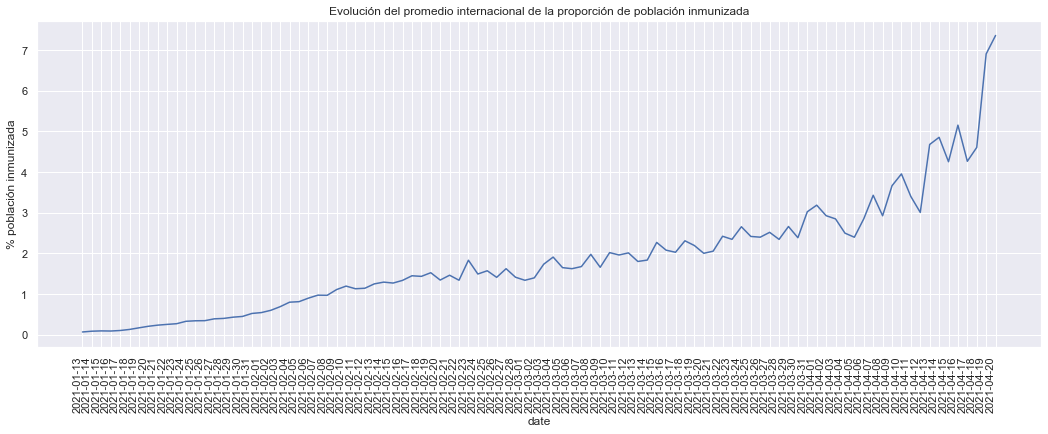

In [47]:
evolucion_temporal = vacunas_df.groupby('date').mean()
evolucion_temporal = evolucion_temporal.reset_index()
plt.figure(figsize=(18, 6))
sns.lineplot(data=evolucion_temporal[30:], x="date", y='people_fully_vaccinated_per_hundred')
plt.ylabel('% población inmunizada')
plt.title("Evolución del promedio internacional de la proporción de población inmunizada")
plt.xticks(rotation=90,ha='right');

Es interesante como se observa lo que parece un crecimiento exponencial en el mes de abril. Esto se debe a que a partir de ese mes, todos los países 'rezagados' que aún no habían empezado a vacunar se han sumado a la tarea.  
Como podemos ver, los valores eran muy bajos hasta mediados de febrero puesto que hasta entonces sólo algunas potencias estaban vacunando.  

Incluiré esta gráfica en el dashboard final, será interesante dotarla de filtros y permitir también mostrar los porcenajes de población vacunada.  

Hemos visualizado la información desde una perspectiva temporal. Intuyo que observar los datos desde una perspectiva distinta podría completar la información obtenida en la primera gráfica. Para ello voy a generar el ranking de países según el porcentaje de población inmunizada:

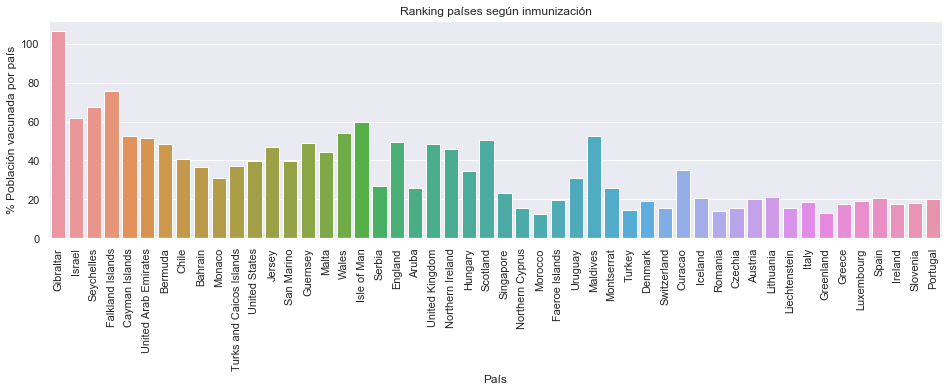

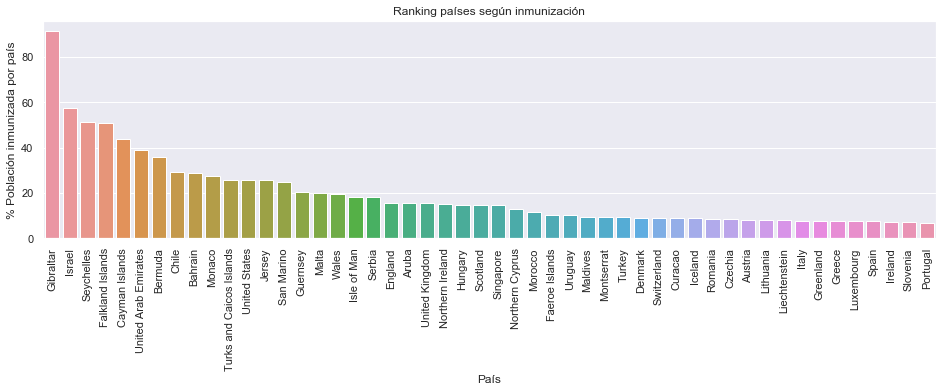

In [73]:
clas_paises = vacunas_df.groupby('country').max()
clas_paises = clas_paises.reset_index()
clas_paises = clas_paises.sort_values(by='people_fully_vaccinated_per_hundred',ascending=False)


plt.figure(figsize=(16, 4))
sns.barplot(data=clas_paises[:50], x="country", y='people_vaccinated_per_hundred')
plt.title("Ranking países según inmunización")
plt.ylabel("% Población vacunada por país")
plt.xlabel("País")
plt.xticks(rotation=90);


plt.figure(figsize=(16, 4))
sns.barplot(data=clas_paises[:50], x="country", y='people_fully_vaccinated_per_hundred')
plt.title("Ranking países según inmunización")
plt.ylabel("% Población inmunizada por país")
plt.xlabel("País")
plt.xticks(rotation=90);

Como vemos, se pobserva algo interesante: poblaciones pequeñas (p.e Falkland Islands) tienen valores más altos que naciones o superpotencias grandes. Tiene cierto sentido, ya que si en una isla son 100 personas, en dos días está todo el mundo vacunado y el porcentaje es del 100%.  

Quitando esos casos, vemos que Gibraltar e Israel van a la cabeza.  

También se pueden observar una serie de localizaciones como las Maldivas, donde el porcentaje de población inmunizada es muy inferior al porcentaje de población vacunada. Esto podría significar que se están demorando con las segundas dosis.  

Estas gráficas no las incluiré tal cual en el dashboard, sino que las voy a unir en una única gráfica de esferas, donde el radio haga alusión al porcentaje de población vacunada mientras que la intensidad de color haga alusión al porcentaje de población inmunizada para cada país. Considero que esta representación da un enfoque más fresco y atractivo para el usuario final además de consensar la información en menos espacio.  

Ahora, sería interesante cambiar el objetivo de estudio. Nos centraremos en las vacunas.  
Me es de gran interés conocer qué vacunas son las más populares, una representación visual que puede resultar muy atractica es un mapa en árbol:

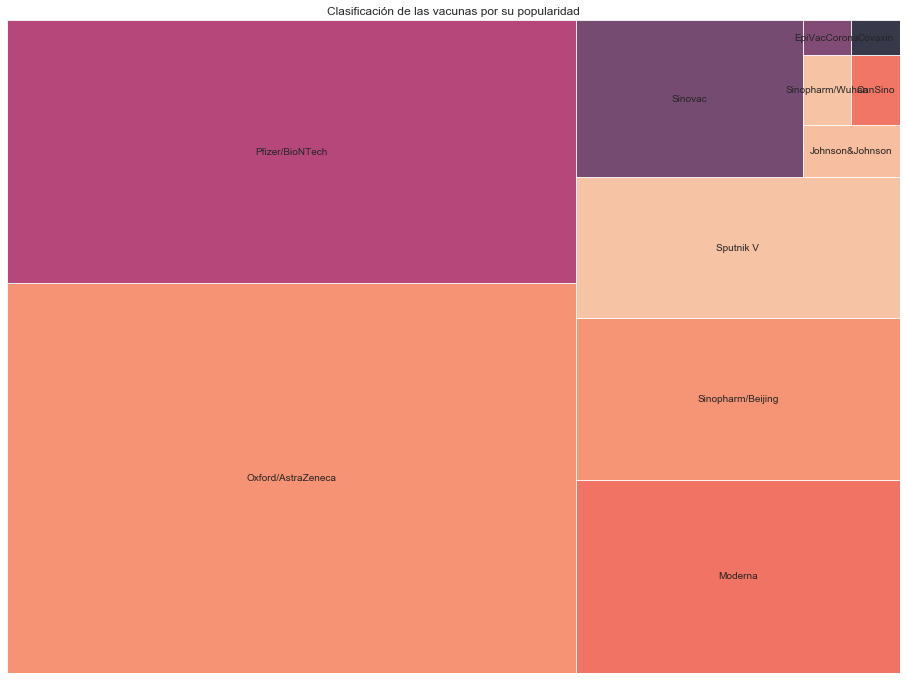

In [29]:
import squarify

por_vacuna = paises_vacunas.groupby('vacuna')['country'].nunique().sort_values(ascending=False)
por_vacuna = por_vacuna.reset_index()
por_vacuna

fig = plt.figure(figsize = (16,12))

squarify.plot(sizes=por_vacuna['country'], label=por_vacuna['vacuna'], alpha=.8 )
plt.title("Clasificación de las vacunas por su popularidad")
plt.axis('off')
plt.show()

Como vemos, la vacuna Oxford/AstraZeneca parece ser la que se llega el gato al agua.  
Por otro lado vemos que las vacunas orientales son las más impopulares.  

Esta visualización será incluída en el dashboard final, además se le brindará capacidad de interacción para que sirva como filtro.

Por último, puede ser interesante observar la cantidad de vacunas usadas por cada país:

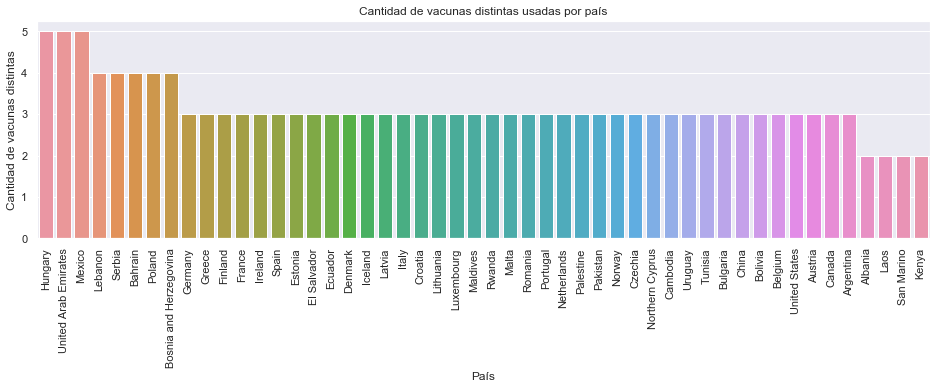

In [74]:
cantidad_vacunas_paises = paises_vacunas.groupby('country')['vacuna'].nunique()
cantidad_vacunas_paises = cantidad_vacunas_paises.reset_index()
cantidad_vacunas_paises = cantidad_vacunas_paises.sort_values(by='vacuna',ascending=False)


plt.figure(figsize=(16, 4))
sns.barplot(data=cantidad_vacunas_paises[:50], x="country", y='vacuna')
plt.title("Cantidad de vacunas distintas usadas por país")
plt.ylabel("Cantidad de vacunas distintas")
plt.xlabel("País")
plt.xticks(rotation=90);


Vemos que hay países que usan 5 vacunas distintas. Esto puede ser señal de falta de previsión (no se compraron las suficientes en su momento, y se han tenido que recurrir a otras fuentes).  

La mayoría de países del primer mundo usan 3 vacunas (Oxford, Pfizer y Moderna).  

Esta información sería interesante mostrarla geográficamente en un mapa, así además de saber la cantidad de vacunas usadas por cada país podremos ver cómo se esparcen estas geográficamente. 